**Import Library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def get_column(data, index):
    result = [x[index] for x in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter = ',', skip_header = 1).tolist()
    N = len(data)

    # get tv (index = 0)
    tv_data = get_column(data, 0)

    # get radio (index = 1)
    radio_data = get_column(data, 1)

    # get newspaper (index = 2)
    newspaper_data = get_column(data, 2)

    # get sales (index = 3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

In [3]:
# Question 1
X, y = prepare_data(r'./advertising.csv')
lst = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(lst)

[624.1, 175.10000000000002, 300.5, 78.9]


In [4]:
def implement_linear_regression(x_data, y_data, epoch_max = 50 , lr = 1e-5):
    losses = []

    w1 , w2 , w3 , b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = x_data[0][i]
            x2 = x_data[1][i]
            x3 = x_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)
    return (w1, w2, w3, b, losses)

def initialize_params():
    w1 = random.gauss(mu = 0.0, sigma = 0.01)
    w2 = random.gauss(mu = 0.0, sigma = 0.01)
    w3 = random.gauss(mu = 0.0, sigma = 0.01)
    b = 0
    return w1, w2, w3, b

def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1 , w2 , w3 , b

def predict(x1, x2, x3, w1, w2, w3, b):
    result = x1 * w1 + x2 * w2 + x3 * w3 + b
    return result

def compute_loss_mse(y, y_hat):
    return (y - y_hat)**2

def compute_gradient_wi(xi, y, y_hat):
    return 2 * (y_hat - y) * xi

def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)

def update_weight_wi(wi, dl_dwi, lr):
    return wi - lr * dl_dwi

def update_weight_b(b, dl_db, lr):
    return b - lr * dl_db

In [5]:
# Question 2:
y = predict(x1 = 1, x2 = 1, x3 = 1, w1 = 0, w2 = 0.5, w3 = 0, b = 0.5)
print(y)

1.0


In [6]:
# Question 3
l = compute_loss_mse(y_hat = 1, y = 0.5)
print(l)

0.25


In [7]:
# Question 4
# MSE loss
g_wi = compute_gradient_wi(xi = 1.0, y = 1.0, y_hat = 0.5)
print(g_wi)

-1.0


In [8]:
# Question 5
g_b = compute_gradient_b(y = 2.0, y_hat = 0.5)
print(g_b)

# update weights
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b

-3.0


In [9]:
# Question 6
after_wi = update_weight_wi(wi = 1.0, dl_dwi = -0.5, lr = 1e-5)
print(after_wi)

1.000005


0.50001


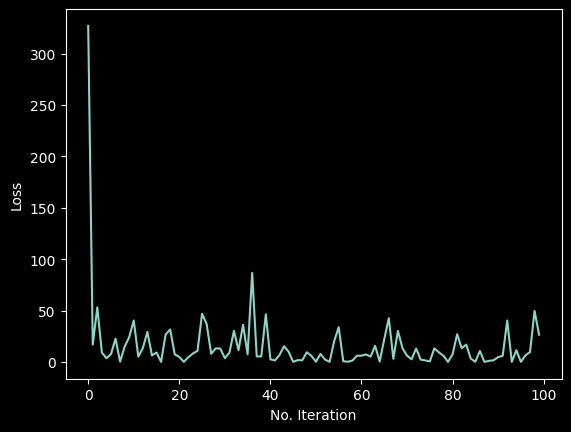

In [10]:
# Question 7
after_b = update_weight_b(b = 0.5, dl_db = -1.0, lr = 1e-5)
print(after_b)
X, y = prepare_data('./advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("No. Iteration")
plt.ylabel("Loss")
plt.show()

In [11]:
# Question 8
X, y = prepare_data('./advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [12]:
# Question 9
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max = 50, lr = 1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


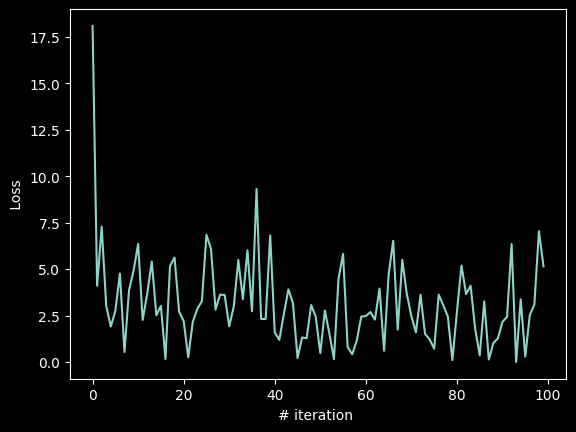

In [13]:
def compute_loss_mae(y, y_hat):
    return abs(y - y_hat)


def implement_linear_regression_mae(x_data, y_data, epoch_max = 50 , lr = 1e-5):
    losses = []

    w1 , w2 , w3 , b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = x_data[0][i]
            x2 = x_data[1][i]
            x3 = x_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mae(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)
    return (w1, w2, w3, b, losses)


X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_mae(X, y)
plt.plot(losses[:100])
plt.xlabel("# iteration ")
plt.ylabel(" Loss ")
plt.show()

In [14]:
# Question 10
l = compute_loss_mae(y_hat = 1, y = 0.5)
print(l)

0.5


In [24]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):

        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # accumulate loss
            loss_total += loss

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # (after processing N samples) - update parameters
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)

        # logging
        losses.append(loss_total / N)
    return (w1, w2, w3, b, losses)

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

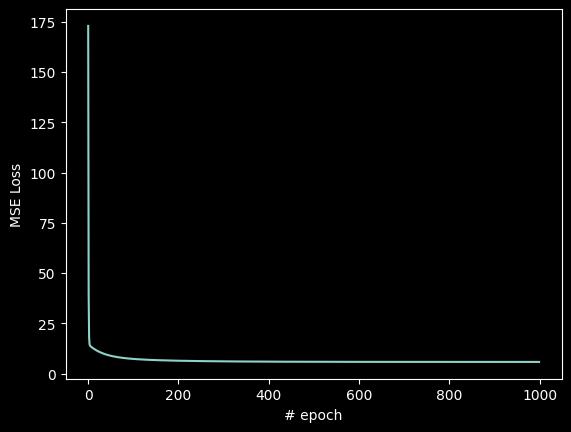

In [16]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max = 1000 , lr = 1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("MSE Loss")
plt.show()

In [17]:
def implement_linear_regression_nsamples_mae(x_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):

        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = x_data[0][i]
            x2 = x_data[1][i]
            x3 = x_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mae(y, y_hat)

            # accumulate loss
            loss_total += loss

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # (after processing N samples) - update parameters
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)

        # logging
        losses.append(loss_total / N)
    return (w1, w2, w3, b, losses)

In [18]:
# Question 11
X, y = prepare_data('advertising.csv')
# using MAE loss
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples_mae(X, y, epoch_max = 1000, lr = 1e-5)
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


[12.537758993110772, 5.905253690937074, 3.7290201321746137, 3.280103342013847, 3.1836865214240593, 3.1504551681146706, 3.1282032310037176, 3.107834776878128, 3.0877653671823877, 3.067869077619822, 3.0482166503078565, 3.02883345816351, 3.0097268958233707, 2.990926260388694, 2.9724018229858893, 2.954147483295836, 2.936159497829541, 2.9184793882434996, 2.9013201899015386, 2.8848065446993694, 2.8692913979087806, 2.8540808729447424, 2.8391539128581824, 2.824441258695949, 2.809939593214031, 2.795661552510065, 2.781611479829696, 2.7677616004414416, 2.7541088214511316, 2.7406510256334013, 2.727970116901554, 2.7155029638904806, 2.703211839174965, 2.6910940299623816, 2.6792629854501695, 2.6676459659520204, 2.6561923391983115, 2.645064404704684, 2.6341944320960224, 2.623535606535408, 2.6130255229490116, 2.6026618964920454, 2.592442478315787, 2.5823650549969863, 2.5725241259925906, 2.562865212228721, 2.553339917055549, 2.5439461929615637, 2.5347454167598515, 2.525816782277532, 2.517347376120849, 2

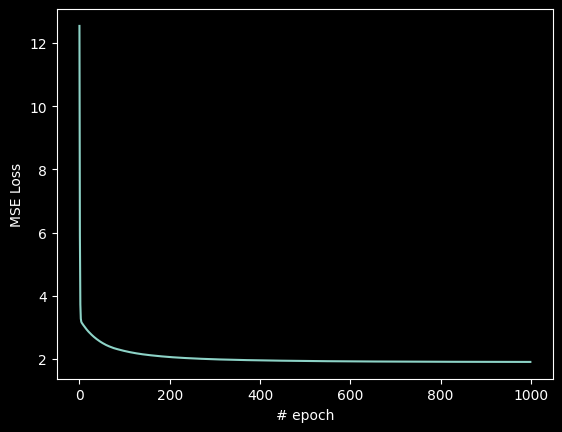

In [19]:
print(losses)
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("MSE Loss")
plt.show()

In [20]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter = ',', skip_header = 1).tolist()
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    # Create list of features for input
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y


def initialize_params():
    bias = 0
    w1 = random.gauss(mu = 0.0, sigma = 0.01)
    w2 = random.gauss(mu = 0.0, sigma = 0.01)
    w3 = random.gauss(mu = 0.0, sigma = 0.01)

    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]


def predict (x_features, weights):  # Predict output by using y = x0*b + x1*w1 + x2*w2 + x3*w3
    result = 0
    for i in range(len(x_features)):
        result += x_features[i] * weights[i]
    return result

def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

# compute gradient
def compute_gradient_w(x_features, y, y_hat):
    dl_dweights = []
    for i in range(len(x_features)):
        dl_dweights.append(2 * (y_hat - y) * x_features[i])
    return dl_dweights

# update weights
def update_weight(weights, dl_dweights, lr):
    for i in range(len(weights)):
        weights[i] = weights[i] - lr * dl_dweights[i]
    return weights

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49


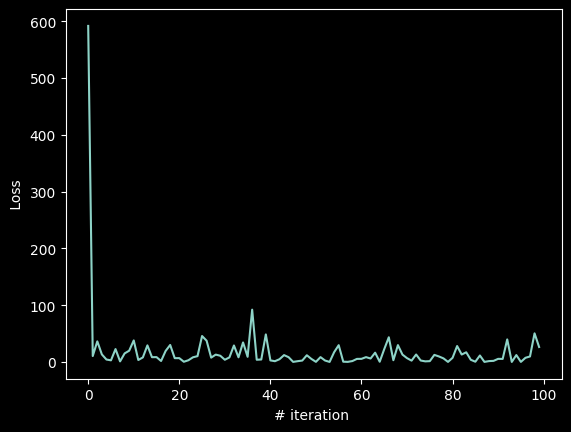

In [21]:
def implement_linear_regression(x_features, y_ouput, epoch_max = 50, lr = 1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_ouput)
    for epoch in range(epoch_max):
        print("epoch ", epoch)
        for i in range(N):
            # get a sample - row i
            features_i = x_features[i]
            y = y_ouput[i]
            y_hat = predict(features_i, weights)    # compute output
            loss = compute_loss(y, y_hat)   # compute loss
            dl_dweights = compute_gradient_w(features_i, y, y_hat)  # compute gradient w1, w2, w3, b
            weights = update_weight(weights, dl_dweights, lr)   # update parameters
            losses.append(loss) # logging
    return weights, losses

X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y)
plt.plot(L[0:100])
plt.xlabel("# iteration ")
plt.ylabel(" Loss ")
plt.show()

In [23]:
# Question 12
X, y = prepare_data(r'./advertising.csv')
W, L = implement_linear_regression(X, y, epoch_max = 50, lr = 1e-5)
# Print loss value at iteration 9999
print(L[9999])

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
31.339223408109948
